# In this notebook , we perfrom some ML algorithms to predict results.

In [15]:
#importing necessary libraries

import sklearn as sks
import pandas as pd
import warnings
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
#reading dataset
df=pd.read_csv('/Users/bibekrai/workspace/Nepal-Livestock-Analysis/Data Analysis/test_data.csv')

In [17]:
df=df.drop(columns='Unnamed: 0')

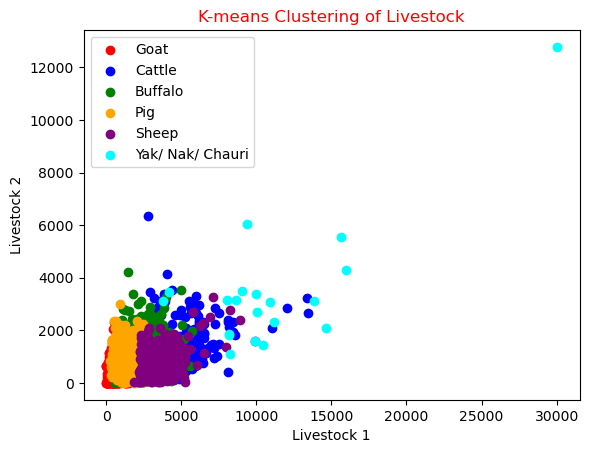

In [36]:
from sklearn.cluster import KMeans

X = df.iloc[:, 2:].values

mylabels = ['Goat', 'Cattle', 'Buffalo', 'Pig', 'Sheep', 'Yak/ Nak/ Chauri']
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

df['Cluster'] = labels

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

for i in range(k):
    cluster_data = X[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=mylabels[i])

plt.xlabel('Livestock 1')
plt.ylabel('Livestock 2')
plt.title('K-means Clustering of Livestock',color='red')
plt.legend()
plt.show()
